download this file: https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt

strip the header and footer, convert it to hdf5, renamed to "mamajek-spectral-class.hdf5"
Save into `/Data` directory.

This table can be used to classify the spectral class of the stars.

# Withouth metallicity cut

In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir
# import utils
root_dir = abspath(join(pardir, pardir))
if root_dir not in sys.path:
    sys.path.append(root_dir)
from utils import style, load_spectral_types, safe_mkdir
style("seaborn-bright", tex=True)

In [2]:
# root data directory path
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [3]:
name = "no"
data_dir = join(root_data_dir, "Color")
safe_mkdir(data_dir)
data_dir = join(root_data_dir, "Color", name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Color already exist. Good to go!
Directory /home2/s20321005/Thesis-Project/Data/Color/no already exist. Good to go!


In [4]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour")
files = glob(join(gaia_dir, "*.hdf5"))
files[:5]

['/home2/s20321005/Thesis-Project/Data/Neighbour/gaia-neighbour.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Neighbour/clustered.hdf5']

In [5]:
# load best pars data
df = vaex.open(files[1])
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213000297546387,10.416000366210938,AAA,4616283493156832640,64.95027923583984,-64.84678804028577,0.01238507591187954,3.665080655375059,0.01239001378417015,11.816099401085904,0.010756381787359715,13.398380279541016,14.354398727416992,12.430805206298828,817.9747314453125,2392.0107421875,1.0612295866012573,1.3268741369247437,2.1613254142300296,-0.5358186393427844,84.85199737548828,84.69239807128906,85.30039978027344,0.3553999960422516,0.3497999906539917,0.36230000853538513,nan,nan,nan,M,00022474-8620303,1,222,--,32.41990661621094,gaia,1.0216929912567139,1.0216929912567139,1.0,3918.379638671875,gspphot,5.97119140625,8.631103515625,0.0,4.763700008392334,gspphot,0.004499912261962891,0.010499954223632812,0.0,nan,--,nan,nan,nan,-0.4165000021457672,gspphot,0.039000004529953,0.03979998826980591,0.0,0.07999999821186066,gspspec,0.04999999888241291,0.07000000774860382,0.0,nan,--,nan,nan,nan,0.7969999313354492,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,1.0216929912567139,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.914999961853027,AAA,4617667606497642368,17.977584838867188,-0.17262960984553632,0.01500760018825531,17.976755781051242,0.01342449989169836,7.029261215530585,0.011353876441717148,13.687113761901855,14.494421005249023,12.808248519897461,1078.7208251953125,2067.694580078125,1.010115146636963,1.290492296218872,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,00021678-8427525,1,222,--,48.249412536621094,gaia,1.7350472211837769,1.7350472211837769,1.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8350000381469727,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,1.7350472211837769,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.133999824523926,12.317000389099121,AAA,4617601567080525696,19.894350051879883,-18.57644369982859,0.03594500198960304,-7.12045526211935,0.03676403686404228,5.814933551816721,0.028319241479039192,15.729541778564453,17.00968360900879,14.611902236938477,176.59393310546875,689.6736450195312,1.0680480003356934,1.4013868570327759,2.168515313114387,-0.5628743542169623,171.8242950439453,170.56480407714844,174.2696075439453,0.426800012588501,0.4198000133037567,0.43299999833106995,nan,nan,nan,M,00022650-8445080,1,222,--,nan,--,nan,nan,nan,3588.7626953125,gspphot,3.59375,3.5283203125,0.0,4.771900177001953,gspphot,0.008300304412841797,0.006099700927734375,0.0,nan,--,nan,nan,nan,-0.03759999945759773,gspphot,0.016300000250339508,0.017299998551607132,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8

In [6]:
spectral_types = load_spectral_types()
spectral_types

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [7]:
# save classification values into numpy array
jk = spectral_types["J-K"].to_numpy()
mj = spectral_types["M_J"].to_numpy()
# cut it below M_J < 5
check = (mj < 5)*(jk > -0.02)
jk = jk[check]
mj = mj[check]

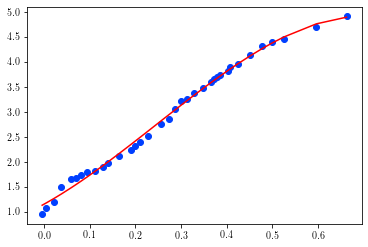

In [8]:
from scipy import interpolate

mj_interp = interpolate.UnivariateSpline(jk, mj, s=1, k=3)

plt.scatter(jk, mj)
plt.plot(jk, mj_interp(jk), c="r")


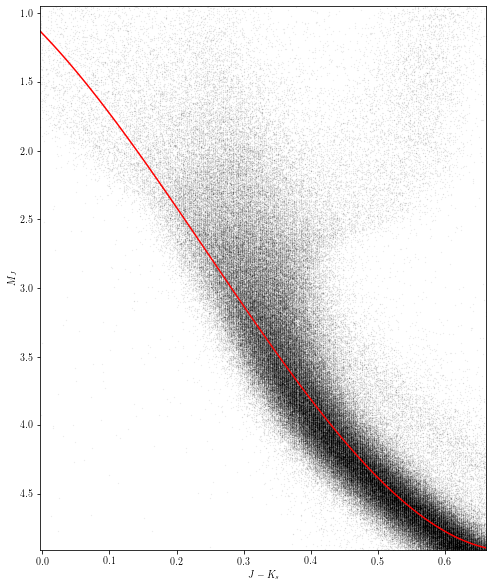

In [48]:
jk_x = np.linspace(jk.min(), jk.max(), 100)
# HR diagram
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.plot(jk_x, mj_interp(jk_x), c="r")
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(jk.min(), jk.max())
plt.ylim(mj.min(), mj.max())
plt.gca().invert_yaxis()
plt.show()

In [49]:
from utils import hdi_sample

jk_s = np.linspace(jk.min(), jk.max(), 5000)
jk_mids = []
jk_highs = []
jk_lows = []
b0 = jk.min() 
jk_sample = df['JK'].to_numpy()
mj_sample = df['M_J'].to_numpy()
count = 0
for b1 in jk_s:
    mask = (jk_sample > b0)*(jk_sample < b1)
    mj_s = mj_sample[mask]
    if len(mj_s) > 1000:
        jk_mid = (b0 + b1)/2
        hpd, _ = hdi_sample(mj_s, low=-1, high=5, alpha=0.20)
        low, high = hpd[0]
        jk_mids.append(jk_mid)
        jk_highs.append(high)
        jk_lows.append(low)
        print(f"[{b0},{b1}]: {len(mj_s)}")
        # count += 1
        # if count > 10:
        #     break
        b0 = b1
        


[-0.004,0.05102260452090418]: 1005
[0.05102260452090418,0.089125425085017]: 1026
[0.089125425085017,0.12003400680136027]: 1037
[0.12003400680136027,0.14308221644328864]: 1022
[0.14308221644328864,0.16200040008001598]: 1035
[0.16200040008001598,0.17705501100220042]: 1022
[0.17705501100220042,0.18904540908181636]: 1040
[0.18904540908181636,0.1990374074814963]: 1093
[0.1990374074814963,0.20703100620124024]: 1050
[0.20703100620124024,0.21409201840368072]: 1115
[0.21409201840368072,0.2200872174434887]: 1027
[0.2200872174434887,0.22608241648329663]: 1099
[0.22608241648329663,0.23101180236047208]: 1006
[0.23101180236047208,0.2360744148829766]: 1131
[0.2360744148829766,0.24100380076015201]: 1211
[0.24100380076015201,0.245000600120024]: 1059


[0.245000600120024,0.24913062612522502]: 1165
[0.24913062612522502,0.253127425485097]: 1116
[0.253127425485097,0.257124224844969]: 1234
[0.257124224844969,0.2600552110422084]: 1003
[0.2600552110422084,0.26311942388477694]: 1047
[0.26311942388477694,0.2660504100820164]: 1127
[0.2660504100820164,0.2691146229245849]: 1180
[0.2691146229245849,0.27204560912182435]: 1177
[0.27204560912182435,0.2751098219643929]: 1260
[0.2751098219643929,0.2780408081616323]: 1263
[0.2780408081616323,0.2811050210042008]: 1410
[0.2811050210042008,0.2840360072014403]: 1409
[0.2840360072014403,0.28603440688137627]: 1008
[0.28603440688137627,0.2890986197239448]: 1471
[0.2890986197239448,0.2910970194038808]: 1046
[0.2910970194038808,0.29309541908381676]: 1130
[0.29309541908381676,0.29509381876375274]: 1143
[0.29509381876375274,0.2970922184436887]: 1141
[0.2970922184436887,0.2990906181236247]: 1153
[0.2990906181236247,0.3010890178035607]: 1157
[0.3010890178035607,0.30308741748349666]: 1174
[0.30308741748349666,0.305

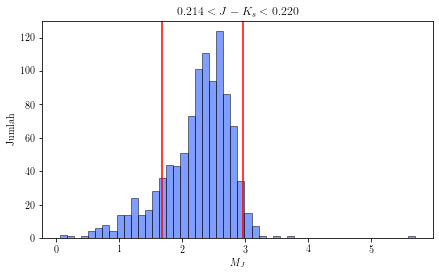

In [41]:
# plt.figure(figsize=(7,4))
# plt.hist(mj_s, bins=50, alpha=0.5, edgecolor='k')
# plt.axvline(low, c="r")
# plt.axvline(high, c="r")
# plt.xlabel(r"$M_J$")
# plt.ylabel("Jumlah")
# plt.title(r"${:.3f} < J-K_s < {:.3f}$".format(b0, b1))
# # plt.savefig(join("..", "img", "mj-hist.pdf"), dpi=70)
# plt.show()

In [50]:
mj_high_interp = interpolate.UnivariateSpline(jk_mids, jk_highs, s=1, k=3)
mj_low_interp = interpolate.UnivariateSpline(jk_mids, jk_lows, s=1, k=3)

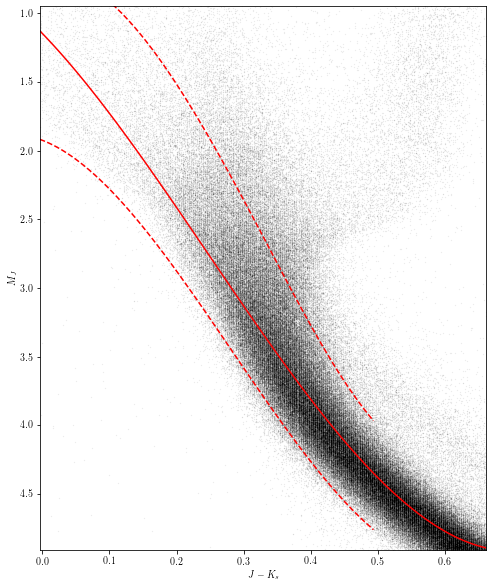

In [51]:
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.plot(jk_x, mj_interp(jk_x), c="r")
mask = jk_x < 0.5
plt.plot(jk_x[mask], mj_high_interp(jk_x[mask]), c="r", ls="--")
plt.plot(jk_x[mask], mj_low_interp(jk_x[mask]), c="r", ls="--")
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(jk.min(), jk.max())
plt.ylim(mj.min(), mj.max())
plt.gca().invert_yaxis()
plt.show()

In [52]:
B9 = spectral_types[spectral_types["SpT"] == "B9V"]['J-K'].to_numpy()[0]
A0 = spectral_types[spectral_types["SpT"] == "A0V"]['J-K'].to_numpy()[0]
BA = (B9+A0)/2

A9 = spectral_types[spectral_types["SpT"] == "A9V"]['J-K'].to_numpy()[0]
F0 = spectral_types[spectral_types["SpT"] == "F0V"]['J-K'].to_numpy()[0]
AF = (A9+F0)/2

F9 = spectral_types[spectral_types["SpT"] == "F9V"]['J-K'].to_numpy()[0]
G0 = spectral_types[spectral_types["SpT"] == "G0V"]['J-K'].to_numpy()[0]
FG = (F9+G0)/2

G3 = spectral_types[spectral_types["SpT"] == "G3V"]['J-K'].to_numpy()[0]
G4 = spectral_types[spectral_types["SpT"] == "G4V"]['J-K'].to_numpy()[0]
GG = (G3+G4)/2
# GG = G8

BA, AF, FG, GG

(-0.019000000000000003, 0.1355, 0.314, 0.376)

In [53]:
jk_low = BA
jk_up = GG
df_mask = df.filter(f"JK < {jk_up}").filter(f"JK > {jk_low}")
df_mask = df_mask.extract()
df_mask["M_J_lower"] = mj_low_interp(df_mask["JK"].to_numpy())
df_mask["M_J_upper"] = mj_high_interp(df_mask["JK"].to_numpy())
df_mask = df_mask.filter("M_J > M_J_lower").filter("M_J < M_J_upper")
df_mask = df_mask.extract()
df_mask

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.0032882177640498373,-1.2621910830881986,7.800000190734863,7.5970001220703125,AAA,4701758461948318848,20.87449836730957,-16.354367148195085,0.01471635326743126,12.9722529499503,0.016420288011431694,8.410454649576556,0.012681514024734497,8.464082717895508,8.652515411376953,8.128384590148926,1851.48095703125,3608.023681640625,0.9388912916183472,1.18311607837677,2.238763800213232,-0.7728458234774394,118.52539825439453,117.81610107421875,118.82469940185547,0.002099999925121665,0.0003000000142492354,0.01730000041425228,nan,nan,nan,F,00004521-7219055,1,111,--,-1.0309404134750366,apogee,0.07304781675338745,0.07304781675338745,1.0,6724.49755859375,gspphot,3.4951171875,30.11328125,0.0,4.15500020980835,gspphot,0.0029001235961914062,0.013399600982666016,0.0,-0.10700999945402145,apogee,0.005179196130484343,0.005179196130484343,1.0,-0.09715799987316132,apogee,0.0066741290502250195,0.0066741290502250195,1.0,0.699999988079071,gspspec,0.039999961853027344,0.030000030994415283,0.0,-0.036324698477983475,apogee,0.01035263016819954,0.01035263016819954,1.0,0.20300006866455078,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,0.07304781675338745,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.5382886954797121,2.8972359292662824
1,0.0071074868596039875,-1.2273890258172142,8.6899995803833,8.392999649047852,AAA,4702959678401321984,37.18967056274414,23.58711228133474,0.011803952045738697,-28.752733940266236,0.014449707232415676,8.74803741556182,0.012488438747823238,9.653302192687988,9.947792053222656,9.193760871887207,2110.06494140625,3865.70654296875,0.910544216632843,1.1956642866134644,2.2506821387235147,-0.8066398204825131,114.01460266113281,113.83480072021484,114.20709991455078,0.0008999999845400453,0.00019999999494757503,0.002400000113993883,-0.05000000074505806,-0.17000000178813934,0.05999999865889549,G,00013773-7019271,1,112,--,24.771608352661133,gaia,0.21023516356945038,0.21023516356945038,1.0,5889.33837890625,gspphot,1.6259765625,2.79736328125,0.0,4.333700180053711,gspphot,0.0020003318786621094,0.00189971923828125,0.0,nan,--,nan,nan,nan,-0.0892999991774559,gspphot,0.004799999296665192,0.00469999760389328,0.0,0.09000000357627869,gspspec,0.01000000536441803,0.019999995827674866,0.0,nan,--,nan,nan,nan,0.2969999313354492,3.399552739669738,114.31135379246405,-82.528939581882,79.0952573632323,-30.63629306822048,21.082910658875736,0.012028147818888,0.014263624470926195,0.21023516356945038,11.423476121089848,-16.599840883743973,0.018046473993364308,-0.024577299313449357,-9.98003914268823,0.15229546180753484,25.38754036485519,0.14604996247002744,-28.87002922881429,0.09379022174407457,-9.306091310006478,0.11462124359924132,2.3310878312621743,3.560909836980773
2,0.00791300866927693,-1.1886556144061122,8.053999900817871,7.76800012588501,AAA,4706617135111506560,106.13522338867188,100.67758019494745,0.012745832093060017,-33.59629691075584,0.01461782120168209,8.819245685888635,0.012825272046029568,8.92143821716

In [47]:
len(df.filter("abs(z) < 200").filter(f"JK < {jk_up}").filter(f"JK > {jk_low}")), len(df_mask.filter("abs(z) < 200"))

(62848, 51612)

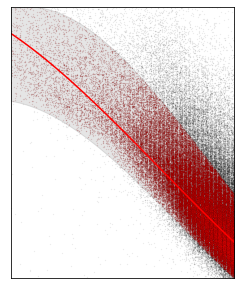

In [54]:
jk_x = np.linspace(jk_low, jk_up, 100)

plt.figure(figsize=(4,5))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
df_mask.viz.scatter("JK", "M_J", c='r', alpha=0.1, s=0.1, length_check=False)
plt.plot(jk_x, mj_interp(jk_x), c="r")
plt.fill_between(jk_x, mj_high_interp(jk_x), mj_low_interp(jk_x), color="k", alpha=0.1)
# plt.xlabel(r"$J-K_s$")
# plt.ylabel(r"$M_J$")
plt.xlabel("")
plt.ylabel("")
plt.xlim(jk_low, jk_up)
plt.ylim(mj_low_interp(jk_x).min(), mj_high_interp(jk_x).max())
plt.xticks([])
plt.yticks([])
plt.gca().invert_yaxis()
# plt.savefig(join("..", "img", "hrd.png"), dpi=300)
plt.show()

check the midplane

In [55]:
df_mid = df_mask.filter("abs(z) < 50").filter("w > -9999")
df_mid = df_mid.extract()
df_mid

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.010886019970416593,0.14809881412055007,5.077000141143799,4.909999847412109,AAA,2746883550050748288,104.96347045898438,-93.86709820610827,0.07529714703559875,-46.97124474797831,0.059896424412727356,26.626807289488895,0.05965271592140198,5.635739326477051,5.781437397003174,5.3413615226745605,1286.078125,701.5516357421875,0.9138281345367432,1.186178207397461,-1.3472591136581011,-0.9156625705105482,37.73139953613281,37.65380096435547,37.8203010559082,0.0,0.0,9.999999747378752e-05,nan,nan,nan,F,00022969+0829075,1,111,--,10.91873836517334,gaia,0.13661456108093262,0.13661456108093262,1.0,7074.23486328125,gspphot,1.42138671875,1.4833984375,0.0,4.057000160217285,gspphot,0.0036001205444335938,0.00279998779296875,0.0,nan,--,nan,nan,nan,-0.7408999800682068,gspphot,0.023200035095214844,0.010899960994720459,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.16700029373168945,2.2035956166574495,37.55613615736636,-29.780755668887814,22.88165105189412,-103.79716075576094,-15.603825744104398,0.07396018137361994,0.06153969109697727,0.13661456108093262,-2.777731976009451,-18.477564231913245,-0.012599176705186203,-0.043439096225776214,-10.350568855849389,0.10860238843004742,4.449760305676502,0.08383196753192353,19.00425552701665,0.04625567004234596,0.2429374123330339,0.08231140170182588,1.2826276442837032,2.66150675204422
1,0.01351256596174286,0.5562382128464298,7.684999942779541,7.382999897003174,AAA,2873571753703279360,12.40060806274414,10.265181659269848,0.022076956927776337,-6.9570910337692,0.011609489098191261,13.10471597581109,0.02095140889286995,8.624852180480957,8.894630432128906,8.179407119750977,5522.19970703125,3433.3466796875,1.0916849374771118,1.200102686882019,-1.2025710408995658,-0.5216512633873294,76.02010345458984,75.89620208740234,76.1427001953125,0.00019999999494757503,0.0,0.0005000000237487257,-0.07999999821186066,-0.18000000715255737,-0.0,F,00030581+3152123,1,111,--,-20.72557258605957,gaia,0.22530630230903625,0.22530630230903625,1.0,5996.29931640625,gspphot,1.02392578125,1.171875,0.0,4.252699851989746,gspphot,0.0019998550415039062,0.0020999908447265625,0.0,nan,--,nan,nan,nan,-0.41850000619888306,gspphot,0.005899995565414429,0.0056999921798706055,0.0,0.18000000715255737,gspspec,0.02000001072883606,0.009999990463256836,0.0,nan,--,nan,nan,nan,0.3020000457763672,3.272138006439996,76.30840697698578,-38.02542983277274,66.15919937089754,8.530093419999593,-9.000698661550752,0.021704949667756483,0.012290948874357548,0.22530630230903625,-3.2555693488129958,3.085350562761478,-0.006845063181010194,0.00927178242645233,7.505240473360578,0.11242967822504604,-19.59131073312822,0.19536978324279183,-9.930625323506526,0.07085536599771995,-17.16745540321129,0.18230423819272024,2.376477752551967,3.596680270405314
2,0.004010260475599891,0.58501532372636,8.102999687194824,7.8480000495910645,AAA,2875041697670647552,61.47052764892578,-48.17686988154811,0.01570531167089939,38.178725727255475,0.009805509820580482,9.49863633067883,0.01598418317735195,9.048184394836426,9.316006660461426,8.611125946044922,3415.154052734375,5794.44091796875,0.890285849571228,1.1962409019470215,-1.2043326494483648,-0.49181908504437266,104.82230377197266,104.65399932861328,105.00440216064453,0.00039999998989515007,0.0,0.0010999

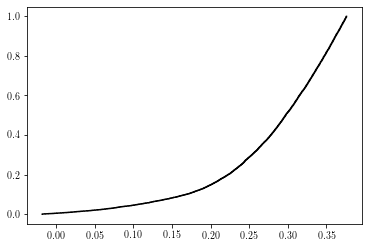

In [56]:
jk_sample = df_mid['JK'].to_numpy()
jk_sample.sort()

plt.plot(jk_sample, np.arange(len(jk_sample))/len(jk_sample), 'k')
# plt.yscale("log")

make sure for each interval, the midplane has at least 1000 stars

In [57]:
jk_edge = np.linspace(jk_sample.min(), jk_sample.max(), 1000)
jk_bound = []
b0 = BA
for i, b1 in enumerate(jk_edge):
    mask = (jk_sample < b1) & (jk_sample >= b0)
    count = jk_sample[mask].shape[0]
    if (count > 1000):
        print(f"[{b0},{b1}: {count}]")
        jk_bound.append((b0, b1))
        b0 = b1

[-0.019000000000000003,0.12713703092512066: 1010]
[0.12713703092512066,0.1902401425816991: 1032]
[0.1902401425816991,0.22021412061857387: 1009]
[0.22021412061857387,0.24230020969837635: 1038]
[0.24230020969837635,0.260047959851789: 1040]
[0.260047959851789,0.27621813221378727: 1056]
[0.27621813221378727,0.28923314899295655: 1020]
[0.28923314899295655,0.301064982428565: 1018]
[0.301064982428565,0.3132912103120271: 1087]
[0.3132912103120271,0.32512304374763557: 1074]
[0.32512304374763557,0.33537729939182953: 1007]
[0.33537729939182953,0.34523716058816994: 1016]
[0.34523716058816994,0.3550970217845103: 1072]
[0.3550970217845103,0.3653512774287043: 1101]
[0.3653512774287043,0.37402795528148386: 1009]


In [20]:
np.save(join(root_data_dir, 'boundaries.npy'), jk_bound)

In [19]:
len(jk_bound)

15

In [21]:
zb = 300.0
zb

300.0

In [22]:
data_dir

'/home2/s20321005/Thesis-Project/Data/Color/no'

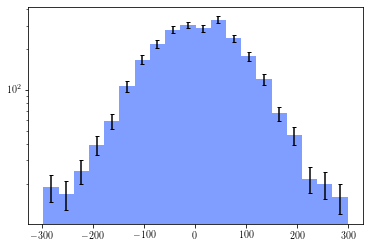

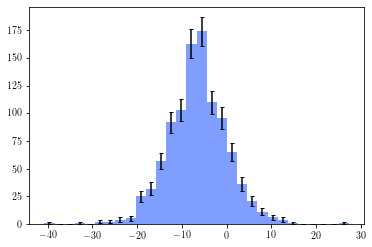

gaia_(-0.019)_(0.127).hdf5 2573 1012


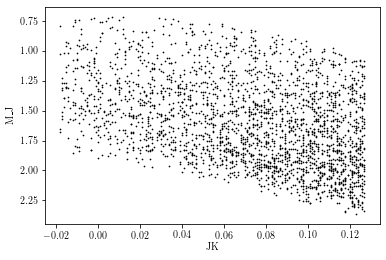

export(hdf5) [########################################] 100.00% elapsed time  :     8.13s =  0.1m =  0.0h      
 

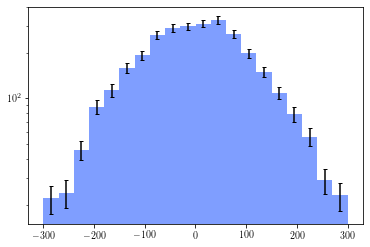

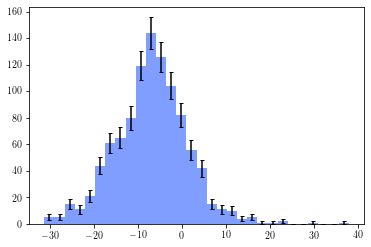

gaia_(0.127)_(0.190).hdf5 3046 1031


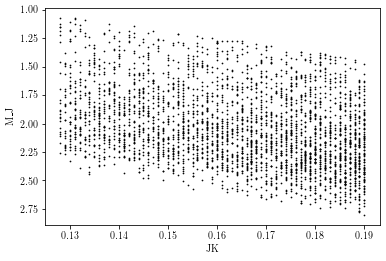

export(hdf5) [########################################] 100.00% elapsed time  :     8.06s =  0.1m =  0.0h     
 

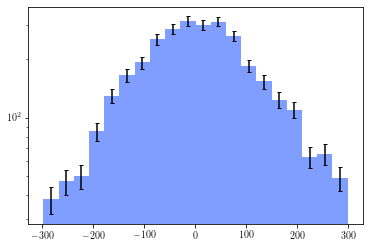

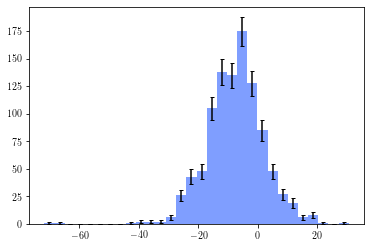

gaia_(0.190)_(0.220).hdf5 3197 1008


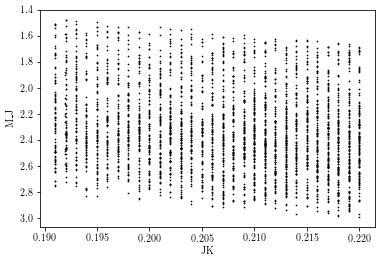

export(hdf5) [########################################] 100.00% elapsed time  :     7.97s =  0.1m =  0.0h   
 

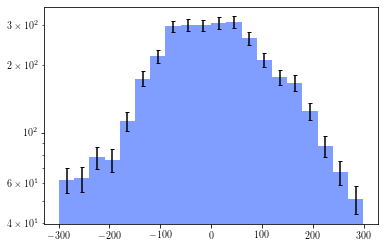

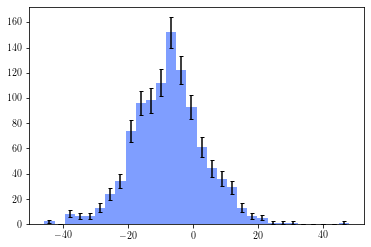

gaia_(0.220)_(0.242).hdf5 3446 1038


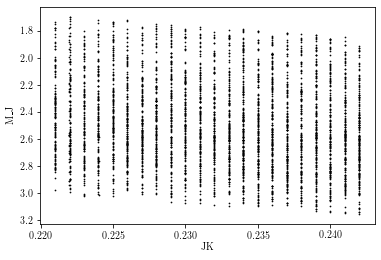

export(hdf5) [########################################] 100.00% elapsed time  :     8.03s =  0.1m =  0.0h         
 

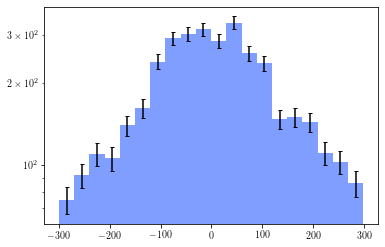

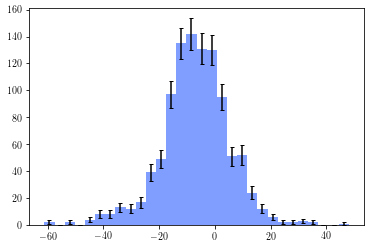

gaia_(0.242)_(0.260).hdf5 3689 1039


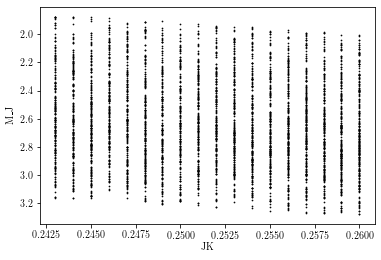

export(hdf5) [########################################] 100.00% elapsed time  :     8.16s =  0.1m =  0.0h  
 

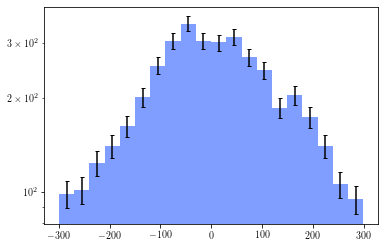

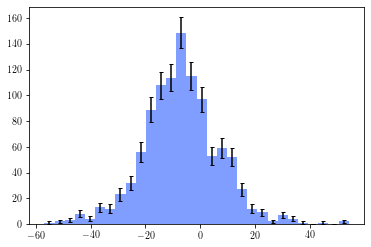

gaia_(0.260)_(0.276).hdf5 4078 1055


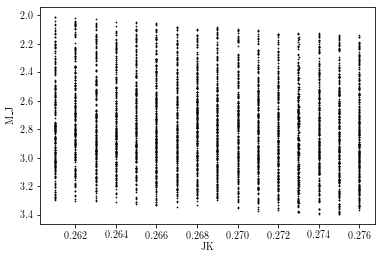

export(hdf5) [########################################] 100.00% elapsed time  :     8.06s =  0.1m =  0.0h    
 

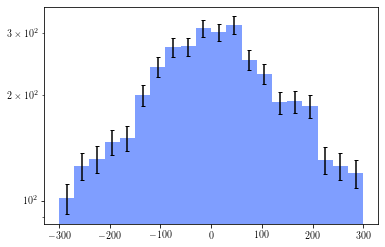

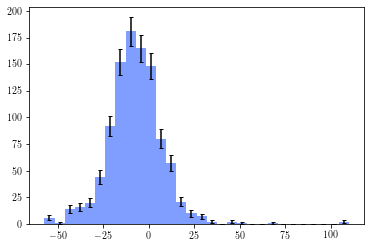

gaia_(0.276)_(0.289).hdf5 4005 1022


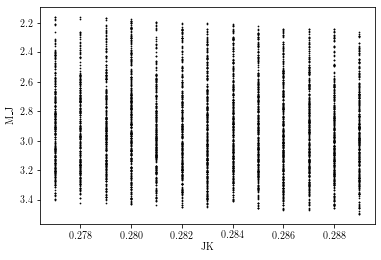

export(hdf5) [########################################] 100.00% elapsed time  :     8.04s =  0.1m =  0.0h    
 

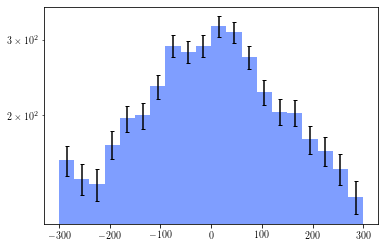

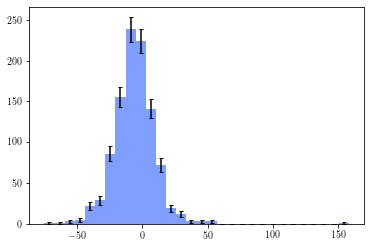

gaia_(0.289)_(0.301).hdf5 4267 1018


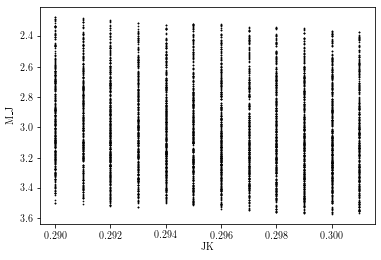

export(hdf5) [########################################] 100.00% elapsed time  :     8.10s =  0.1m =  0.0h 
 

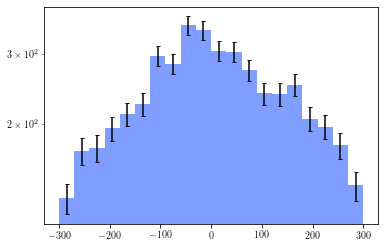

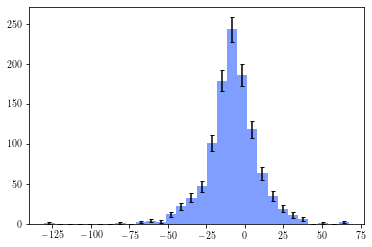

gaia_(0.301)_(0.313).hdf5 4720 1089


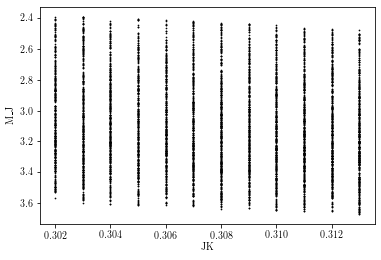

export(hdf5) [########################################] 100.00% elapsed time  :     8.15s =  0.1m =  0.0h      
 

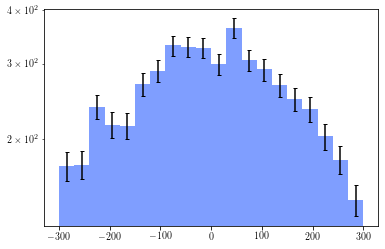

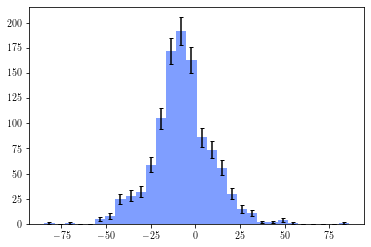

gaia_(0.313)_(0.325).hdf5 5097 1073


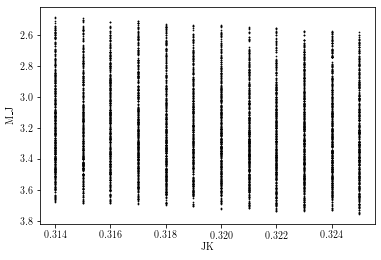

export(hdf5) [########################################] 100.00% elapsed time  :     8.18s =  0.1m =  0.0h   
 

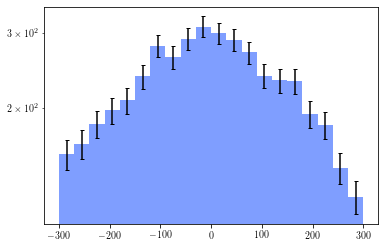

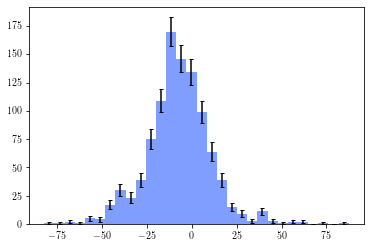

gaia_(0.325)_(0.335).hdf5 4491 1007


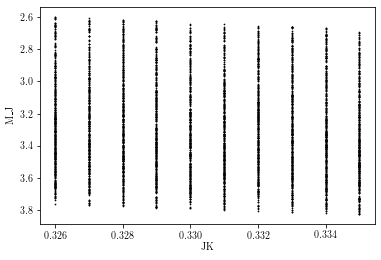

export(hdf5) [########################################] 100.00% elapsed time  :     8.11s =  0.1m =  0.0h    
 

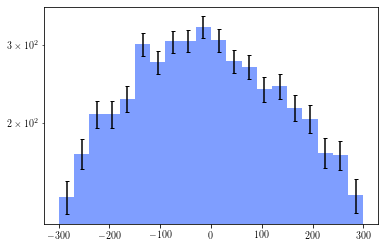

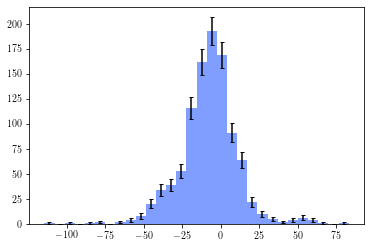

gaia_(0.335)_(0.345).hdf5 4704 1015


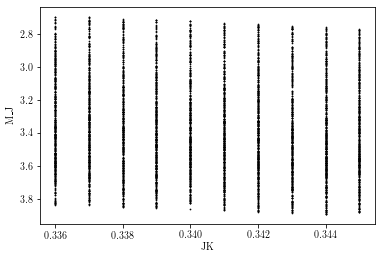

export(hdf5) [########################################] 100.00% elapsed time  :     8.07s =  0.1m =  0.0h     
 

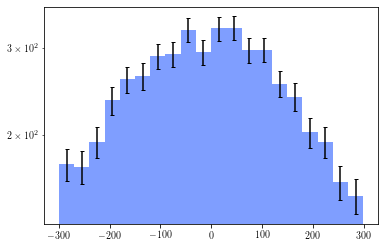

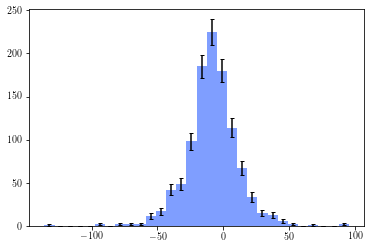

gaia_(0.345)_(0.355).hdf5 4950 1071


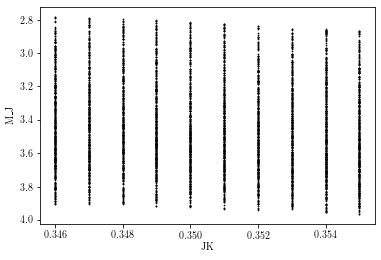

export(hdf5) [########################################] 100.00% elapsed time  :     8.23s =  0.1m =  0.0h   
 

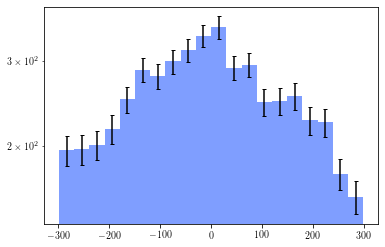

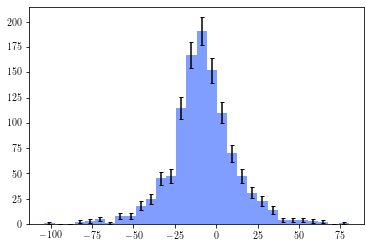

gaia_(0.355)_(0.365).hdf5 5054 1101


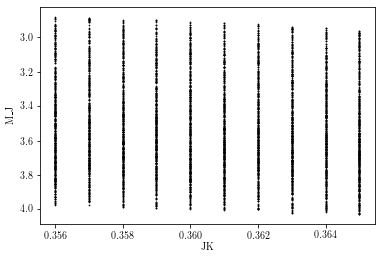

export(hdf5) [########################################] 100.00% elapsed time  :     8.01s =  0.1m =  0.0h     
 

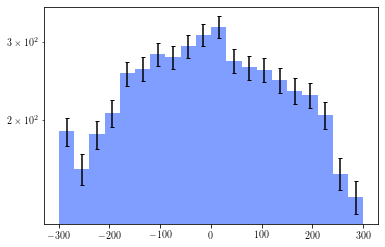

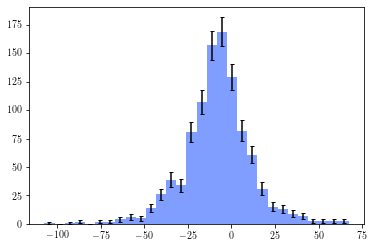

gaia_(0.365)_(0.374).hdf5 4736 1009


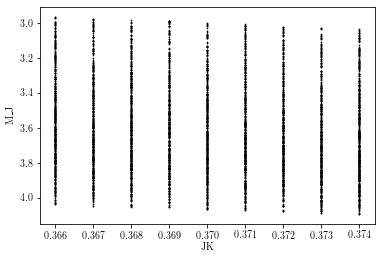

export(hdf5) [########################################] 100.00% elapsed time  :     8.07s =  0.1m =  0.0h   
 

In [23]:
for jk_b in jk_bound:
    jk_low, jk_high = jk_b[0], jk_b[1]
    df_mask_i = df_mask.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}").filter(f"abs(z) < {zb}").filter("w > -9999")
    name = f"gaia_({jk_low:.3f})_({jk_high:.3f}).hdf5"
    zs = df_mask_i["z"].to_numpy()
    znum, zedge = np.histogram(zs, bins=20)
    zmid = (zedge[1:]+zedge[:-1])/2
    zerr = np.sqrt(znum)
    dz = np.diff(zedge)[0]
    plt.bar(zmid, znum, yerr=zerr, width=dz, alpha=0.5, capsize=2)
    plt.yscale("log")
    plt.show()
    df_mid_i = df_mask_i.filter("abs(z) < 50")
    df_mid_i = df_mid_i.extract()
    ws = df_mid_i["w"].to_numpy()
    wnum, wedge = np.histogram(ws, bins=30)
    wmid = (wedge[1:]+wedge[:-1])/2
    werr = np.sqrt(wnum)
    dw = np.diff(wedge)[0]
    plt.bar(wmid, wnum, yerr=werr, width=dw, alpha=0.5, capsize=2)
    plt.show()
    print(name, len(df_mask_i), len(df_mid_i))
    df_mask_i.viz.scatter("JK", "M_J", c='k', alpha=1, s=0.5, length_check=False)
    plt.gca().invert_yaxis()
    plt.show()
    df_mask_i.export(join(data_dir, name), progress=True)
    # break